# Model validation with external data
In this notebook I will try to get the performance of the model on an external dataset I have obtained from ChEMBL [here](https://www.ebi.ac.uk/chembl/assay_report_card/CHEMBL1794573/)
- The dataset contains [Small Molecule Inhibitors of the Human hERG Channel Activity](https://www.ebi.ac.uk/chembl/assay_report_card/CHEMBL1794573/)
- I'll Clean the [dataset](https://www.ebi.ac.uk/chembl/g/#browse/compounds/filter/_metadata.related_assays.all_chembl_ids%3ACHEMBL1794573)
- Add class to represent hERG blokers
- Run prediction for the smae smile suing eos30(the model implemented by ersilia)
- Compare results using several ML performance metrics

# Table of Contents
- [Load and clean external dataset](#section-1)
- [Run eos30gr model with new data](#section-2)
- [Remove molecules which are availalbe in the eos30gr training and validation set](#section-3)
- [Compare both outputs and visualize analysis](#section-4)

In [4]:
#import necessay files and fload file
import pandas as pd
from rdkit import Chem
import os
external_Dataset = os.path.abspath('../data/Task3/hERG_Blockers_Data_from_CHEMBL.csv')


<a id='section-1'></a>
### Load and clean hERG blockers dataset from CHEMBL

In [5]:
# Read the CSV file
df = pd.read_csv(external_Dataset, delimiter=';')

# Keep only the 'Smiles' column and add a 'Class' column with value 1
df = df[['Smiles']].copy()
df['Class'] = 1
# Save the cleaned data to a new CSV file
df.to_csv('../data/Task3/cleaned_external_dataset.csv', index=False)

In [7]:
# Read the CSV file with SMILES strings
Cleaned_Dataset = os.path.abspath('../data/Task3/cleaned_external_dataset.csv')
cleaned_df = pd.read_csv(Cleaned_Dataset, delimiter=',')

print(cleaned_df.columns)

# Clean the SMILES strings and remove invalid ones
valid_smiles = []
for smile in cleaned_df['Smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        valid_smiles.append(Chem.MolToSmiles(mol))
    else:
        valid_smiles.append(None)

# Update the DataFrame with the cleaned SMILES
cleaned_df['Smiles'] = valid_smiles

# Remove rows with invalid SMILES
cleaned_df = cleaned_df.dropna(subset=['Smiles'])

# Save the cleaned data to a new CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)

Index(['Smiles', 'Class'], dtype='object')


TypeError: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type float

In [8]:
# Check for NaN values in the 'Smiles' column
import numpy as np
Cleaned_Dataset = os.path.abspath('../data/Task3/cleaned_external_dataset.csv')
cleaned_df = pd.read_csv(Cleaned_Dataset, delimiter=',')
nan_indices = cleaned_df['Smiles'].index[cleaned_df['Smiles'].apply(lambda x: isinstance(x, float) and np.isnan(x))]

# Remove rows with NaN values in the 'Smiles' column
cleaned_df = cleaned_df.drop(nan_indices)

# Clean the SMILES strings and remove invalid ones
valid_smiles = []
for smile in cleaned_df['Smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        valid_smiles.append(Chem.MolToSmiles(mol))
    else:
        valid_smiles.append(None)

# Update the DataFrame with the cleaned SMILES
cleaned_df['Smiles'] = valid_smiles

# Remove rows with invalid SMILES
cleaned_df = cleaned_df.dropna(subset=['Smiles'])

# Save the cleaned data to a new CSV file
cleaned_df.to_csv('../data/Task3/cleaned_data.csv', index=False)

In [14]:
#standardize smiles
import sys
sys.path.append('../src')
from src.processing import standardise_smiles_from_csv
unstandardized_smiles = os.path.abspath('../data/Task3/cleaned_data.csv')
standardized_smiles = os.path.abspath('../data/Task3/standardized_smiles.csv')
#standardized and save file
standardise_smiles_from_csv(unstandardized_smiles, standardized_smiles)

Number of standardized SMILES: 634


### standarding smiles for ersilia model
- Rename the Standardized_SMILES column to smiles
- Move the smiles column to the first position for eos30gr to detect it

In [7]:
import os
import pandas as pd
standardized = os.path.abspath('../data/Task3/standardized_smiles.csv')


# Read the CSV file
stan_df = pd.read_csv(standardized)

# Remove the 'Smiles' column
stan_df = stan_df.drop(columns=['smiles'])

# Rename the 'Standardized_SMILES' column to 'Smiles'
stan_df = stan_df.rename(columns={'Standardized_SMILES': 'smiles'})

# Move the 'Smiles' column to the first position
cols = stan_df.columns.tolist()
cols = ['smiles'] + [col for col in cols if col != 'smiles']
stan_df = stan_df[cols]

# Save the modified DataFrame to a new CSV file
stan_df.to_csv('../data/Task3/modified_file.csv', index=False)

In [14]:
import pandas as pd
from rdkit import Chem
from rdkit import Chem

# Read the CSV file
modified_for_Ersilia = os.path.abspath('../data/Task3/modified_file.csv')
df = pd.read_csv(modified_for_Ersilia)

# Convert 'smiles' column to string
df['smiles'] = df['smiles'].astype(str)

# Filter out rows with empty or unstandardized SMILES
valid_smiles = []
for smile in df['smiles']:
    if smile.strip() == "":
        continue
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        valid_smiles.append(smile)

# Update the DataFrame with the filtered SMILES
df = df[df['smiles'].isin(valid_smiles)]

# Save the filtered data back to the same file
df.to_csv('../data/Task3/eos30gr_input.csv', index=False)

[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Error: syntax error while parsing: nan
[21:34:38] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[21:34:38] SMILES Parse Err

<a id='section-2'></a>
#### Load output generate by ersilia model eos30gr
- the data was run using 
   - ersilia fetch eos30gr --from_github
   - ersilia serve eos30gr
   -  ersilia api run -i sample_input_smiles.csv -o eos30gr_output.csv

In [15]:
#Load data and start comparing outputs
eos30gr_output = os.path.abspath('../data/Task3/eos30gr_output.csv')
df = pd.read_csv(eos30gr_output)

# Display the first few rows
print(df.head())

                           key  \
0  FNKBVTBXFLSTPB-LBPRGKRZSA-N   
1  MDMWHKZANMNXTF-UHFFFAOYSA-N   
2  BGMZUEKZENQUJY-UHFFFAOYSA-N   
3  NIGWMJHCCYYCSF-UHFFFAOYSA-N   
4  OCOKWVBYZHBHLU-UHFFFAOYSA-N   

                                               input  activity10  
0                  CCCN(CCC)[C@H]1CCc2c(F)ccc(O)c2C1    0.385019  
1      COC(=O)c1c(C)[nH]c(C)c1C(=O)c1ccccc1Cc1ccccc1    0.457921  
2                            COc1cc(CC(C)N)c(OC)cc1I    0.163036  
3                            NC(Cc1ccc(Cl)cc1)C(=O)O    0.232673  
4  CC(C)COC(=O)OCN1C(=O)CN(CCN2CC(=O)N(COC(=O)OCC...    0.157591  


In [5]:
#adding class to eos30gr output based of threshold 0.5
# Set the threshold value
threshold = 0.5

# Apply the thresholding logic
df['Class'] = df['activity10'].apply(lambda x: 1 if x > threshold else 0)

# Save the updated DataFrame back to a CSV file
df.to_csv('../data/Task3/eos30gr_with_class.csv', index=False)

<a id='section-3'></a>
Remove molecules which are availalbe in the eos30gr Training and validation set

In [7]:
#Load and merge eso30gr training and testing datset 
training = os.path.abspath('../data/Task3/trainingset.csv')
validation = os.path.abspath('../data/Task3/validationset.csv')
train_df = pd.read_csv(training)
validation_df = pd.read_csv(validation)

# Get the list of SMILES from training and validation datasets
train_smiles = set(train_df['Smiles'])
validation_smiles = set(validation_df['Smiles'])

# Read the eos30gr.csv file
eos30gr = os.path.abspath('../data/Task3/eos30gr_with_class.csv')
eos30gr_df = pd.read_csv(eos30gr)

# Filter out the SMILES from eos30gr.csv that are in the training or validation datasets
filtered_smiles = eos30gr_df[~eos30gr_df['smiles'].isin(train_smiles.union(validation_smiles))]

# Save the filtered SMILES to a new CSV file
filtered_smiles.to_csv('../data/Task3/filtered_eos30gr.csv', index=False)


<a id='section-4'></a>
Compare the two prediction

In [8]:
#add class to eos30gr output
eos30gr_output = os.path.abspath('../data/Task3/eos30gr_with_Class.csv')
test = os.path.abspath('../data/Task3/test.csv')
import pandas as pd
from sklearn.metrics import confusion_matrix

# Read the CSV files
df1 = pd.read_csv(eos30gr_output)
df2 = pd.read_csv(test)

# Merge the two DataFrames on the 'smiles' column
merged_df = pd.merge(df1, df2, on='smiles', how='inner')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(merged_df['Class_x'], merged_df['Class_y'])

print(conf_matrix)

# Apply the threshold
df['Class'] = (df['activity10'] > 0.5).astype(int)

# Optional: Save the modified dataframe back to a CSV file
df.to_csv('../data/Task3/confusion_matrix.csv', index=False)

[[  0 354]
 [  0 284]]


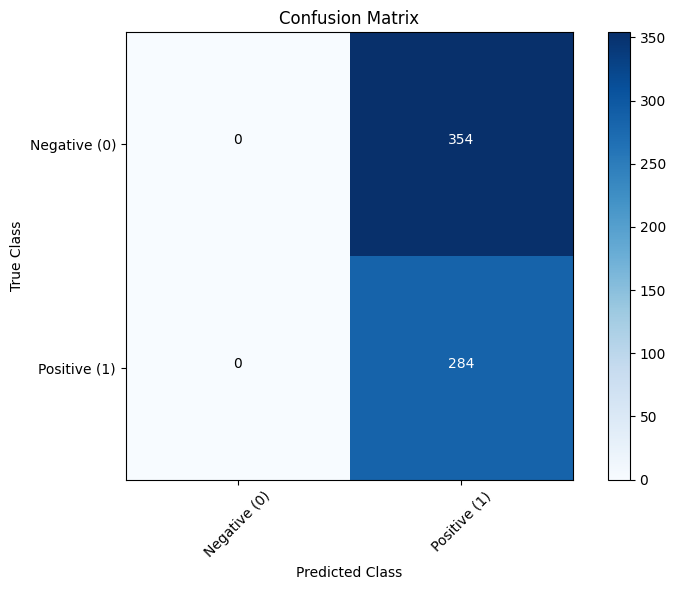

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[0, 354], [0, 284]])

# Define the class labels
classes = ['Negative (0)', 'Positive (1)']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

Above output is expected since my test dataset onyl contains list og hERG blockers

c:\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


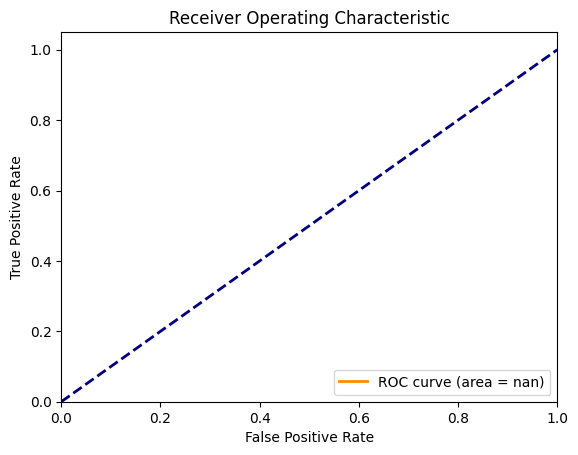

In [10]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv(eos30gr_output)
df2 = pd.read_csv(test)


# Merge the two DataFrames on the 'smiles' column
merged_df = pd.merge(df1, df2, on='smiles', how='inner')

#  'activity10' is the model's output and 'Class_y' is the test class
fpr, tpr, _ = roc_curve(merged_df['Class_y'], merged_df['activity10'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

I need samples with negative datas to have more meaningful roc-cruve so I'll instead use Matthews Correlation Coefficient (MCC):instead

In [11]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Read the model output and test class CSV files
model_output_df = pd.read_csv(eos30gr)
test_class_df = pd.read_csv(test)

#'Class' is the model's output and 'Class_Test' is the test class
y_true = test_class_df['Class']
y_pred = model_output_df['Class']

# Calculate evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

# Print the evaluation metrics
print("Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, Accuracy: {:.4f}, MCC: {:.4f}".format(
    precision, recall, f1score, accuracy, mcc))

Precision: 1.0000, Recall: 0.4416, F1-Score: 0.6127, Accuracy: 0.4416, MCC: 0.0000


Precision: The eos30gr model correctly identified all positive instances it predicted, which is great! However, this metric alone doesn't tell us the full story.

Recall: The eos30gr model managed to capture about 44% of all the actual positive instances. This means it's missing some positive cases.

F1-Score: This metric combines precision and recall to give a balanced view. The eos30gr model achieved a score of about 0.61, indicating a decent balance between identifying true positives and not misclassifying negatives.

Accuracy: The overall accuracy of the eos30gr model is about 44%, meaning it correctly predicted 44% of all instances. This metric can be misleading in imbalanced datasets.

MCC (Matthews Correlation Coefficient): The MCC takes into account true positives, true negatives, false positives, and false negatives. The eos30gr model's MCC of 0.0 suggests that its performance is no better than random chance on this dataset.

In summary, while the eos30gr model excels in precision, it falls short in recall, and its overall performance, as indicated by the MCC, is not satisfactory.